In [5]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from src.utils import helper

In [31]:
sns.set(color_codes=True)

# Experiments on Fetch Push Task

In [85]:
push_uniform_200 = pd.read_csv("logs/FetchPush-v1/random_0.1-1.0_200_epochs/progress.csv")

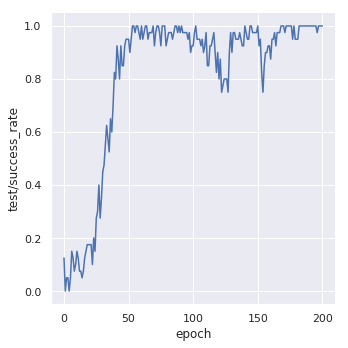

In [86]:
sns.relplot(x="epoch",y="test/success_rate", kind="line", data=push_uniform_200)

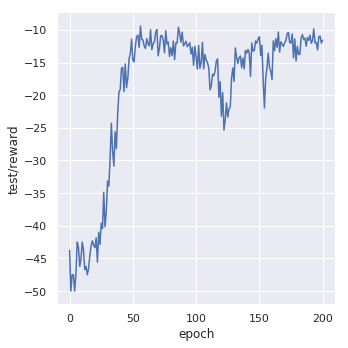

In [88]:
sns.relplot(x="epoch",y="test/reward", kind="line", data=push_uniform_200)

# Experiments on Fetch Slide Task

## Learned MDN Prior

In [52]:
mdn_prior_file = "friction_prior.pkl"
friction_mean = torch.from_numpy(np.float32(np.array([0.56])))

In [53]:
mdn = helper.load(mdn_prior_file)

In [54]:
friction_posterior = mdn.get_mog(friction_mean)

In [55]:
prior_samples = []
for _ in range(1000):
   prior_samples.append(friction_posterior.gen())

Text(0.5, 0, 'Friction')

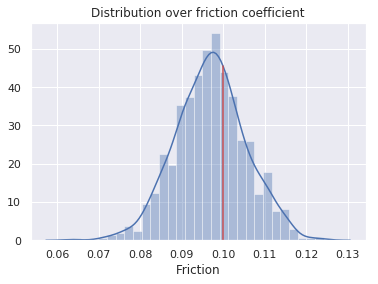

In [60]:
sns.distplot(np.array(prior_samples).reshape(-1,1))
plt.axvline(0.1, 0,0.8, color='r')
plt.title("Distribution over friction coefficient")
plt.xlabel("Friction")

### Fetch Slide Friction Randomization with uniform prior 0.1 - 1.0

In [61]:
slide_uniform_200 = pd.read_csv("logs/FetchSlide-v1/random_0.1-1.0_200_epochs/progress.csv")

In [62]:
slide_uniform_200.columns

Index(['test/mean_Q', 'test/reward', 'train/success_rate', 'stats_o/mean',
       'epoch', 'train/episode', 'train/reward', 'test/episode',
       'train/friction', 'stats_o/std', 'stats_g/mean', 'test/success_rate',
       'test/friction', 'stats_g/std'],
      dtype='object')

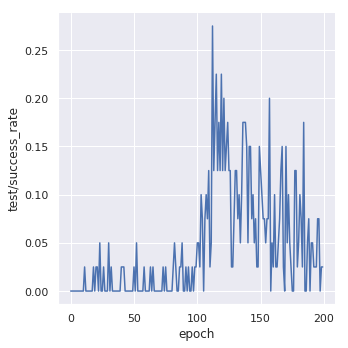

In [74]:
sns.relplot(x="epoch",y="test/success_rate", kind="line", data=slide_uniform_200)

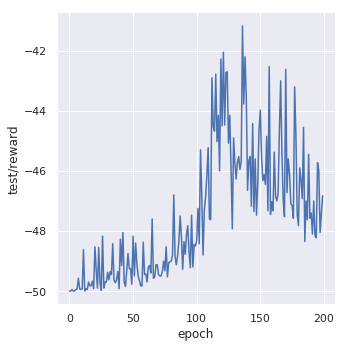

In [79]:
sns.relplot(x="epoch",y="test/reward", kind="line", data=slide_uniform_200)

### Fetch Slide Friction Randomization with learned MDN prior

In [76]:
slide_mdn_200 = pd.read_csv("logs/FetchSlide-v1/prior_0.085_200_epochs/progress.csv")

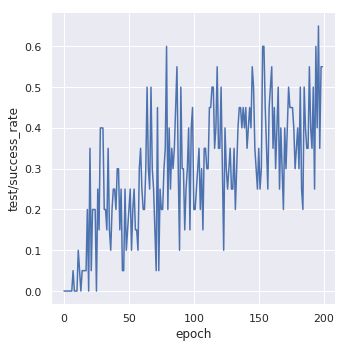

In [77]:
sns.relplot(x="epoch",y="test/success_rate", kind="line", data=slide_mdn_200)

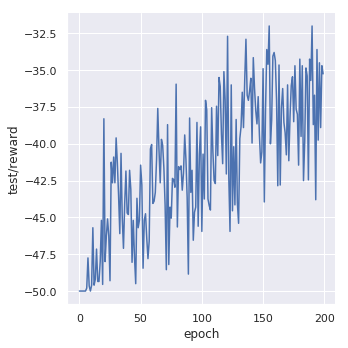

In [80]:
sns.relplot(x="epoch",y="test/reward", kind="line", data=slide_mdn_200)

### Fetch Slide No Friction Randomization

In [82]:
slide_fixed_200 = pd.read_csv("logs/FetchSlide-v1/fixed_0.1_200_epochs/progress.csv")

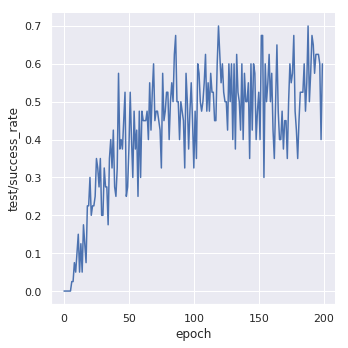

In [83]:
sns.relplot(x="epoch",y="test/success_rate", kind="line", data=slide_fixed_200)

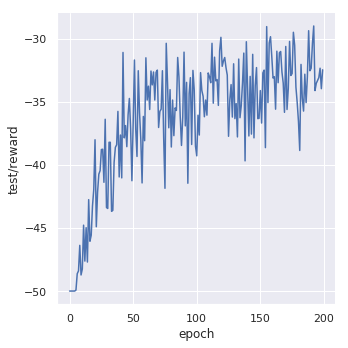

In [84]:
sns.relplot(x="epoch",y="test/reward", kind="line", data=slide_fixed_200)